<a href="https://colab.research.google.com/github/ralbu85/AI_student/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 다운로드

In [51]:
import pandas as pd
df=pd.read_csv('https://www.dropbox.com/s/kbi1mnpq27w5dcq/weather-denmark.csv?dl=1')


In [52]:
df.head()

,City,DateTime,Temp,Pressure,WindSpeed,WindDir
0,Aalborg,1980-03-01 00:00:00,5.0,1008.1,11.3,290.0
1,Aalborg,1980-03-01 00:20:00,4.0,NaN,9.2,270.0
2,Aalborg,1980-03-01 00:50:00,4.0,NaN,9.2,280.0
3,Aalborg,1980-03-01 01:20:00,4.0,NaN,9.2,280.0
4,Aalborg,1980-03-01 01:50:00,4.0,NaN,8.7,270.0


In [55]:
df['City'].unique()

array(['Aalborg', 'Aarhus', 'Esbjerg', 'Odense', 'Roskilde'], dtype=object)

## 시간 처리하기

In [56]:
df.dtypes

City          object
DateTime      object
Temp         float64
Pressure     float64
WindSpeed    float64
WindDir      float64
dtype: object

In [57]:
## 시간을 파이썬이 인식할 수있는 시간으로 바꾸기
df['DateTime']=pd.to_datetime(df['DateTime'])
df=df.set_index('DateTime') # 변환된 날짜 객체를 데이터프레임의 인덱스로 변경



In [59]:
df.index

DatetimeIndex(['1980-03-01 00:00:00', '1980-03-01 00:20:00',
               '1980-03-01 00:50:00', '1980-03-01 01:20:00',
               '1980-03-01 01:50:00', '1980-03-01 02:20:00',
               '1980-03-01 03:00:00', '1980-03-01 03:20:00',
               '1980-03-01 04:00:00', '1980-03-01 04:01:00',
               ...
               '2018-03-01 20:50:00', '2018-03-01 21:00:00',
               '2018-03-01 21:20:00', '2018-03-01 21:50:00',
               '2018-03-01 22:00:00', '2018-03-01 22:20:00',
               '2018-03-01 22:50:00', '2018-03-01 23:00:00',
               '2018-03-01 23:20:00', '2018-03-01 23:50:00'],
              dtype='datetime64[ns]', name='DateTime', length=2918150, freq=None)

In [60]:
# 아트와 경험의 영역
df['Day']=df.index.dayofyear
df['Hour']=df.index.hour


In [61]:
df

,City,Temp,Pressure,WindSpeed,WindDir,Day,Hour
DateTime,,,,,,,
1980-03-01 00:00:00,Aalborg,5.0,1008.1,11.3,290.0,61,0
1980-03-01 00:20:00,Aalborg,4.0,NaN,9.2,270.0,61,0
1980-03-01 00:50:00,Aalborg,4.0,NaN,9.2,280.0,61,0
1980-03-01 01:20:00,Aalborg,4.0,NaN,9.2,280.0,61,1
1980-03-01 01:50:00,Aalborg,4.0,NaN,8.7,270.0,61,1
...,...,...,...,...,...,...,...
2018-03-01 22:20:00,Roskilde,-5.0,NaN,5.1,70.0,60,22
2018-03-01 22:50:00,Roskilde,-5.0,NaN,4.1,70.0,60,22
2018-03-01 23:00:00,Roskilde,-5.3,1018.6,4.1,60.0,60,23


## 도시별 60분 간격 샘플링 및 보간

In [62]:
cities=df['City'].unique() #도시의 목록
cityData={} # 파이썬 딕셔너리, 키값: 도시이름, 밸류: 도시 이름에 해당하는 dataframe
for city in cities: #
    data=df[df['City']==city].resample('60T').last() #60분 간격으로 데이터를 쪼갠 후, 각 간격에서 마지막 데이터를 골라서 샘플링
    cityData[city]=data.interpolate() #누락 데이터는 선형 보간법으로 채우기  


## 그래프 그려보기

In [63]:
cityData['Aalborg']

,City,Temp,Pressure,WindSpeed,WindDir,Day,Hour
DateTime,,,,,,,
1980-03-01 00:00:00,Aalborg,4.0,1008.100000,9.2,280.0,61.0,0.0
1980-03-01 01:00:00,Aalborg,4.0,1007.300000,8.7,270.0,61.0,1.0
1980-03-01 02:00:00,Aalborg,4.0,1006.500000,9.2,280.0,61.0,2.0
1980-03-01 03:00:00,Aalborg,4.0,1005.700000,11.8,280.0,61.0,3.0
1980-03-01 04:00:00,Aalborg,3.0,1005.766667,11.3,300.0,61.0,4.0
...,...,...,...,...,...,...,...
2018-03-01 19:00:00,Aalborg,-4.0,1024.200000,7.2,70.0,60.0,19.0
2018-03-01 20:00:00,Aalborg,-4.0,1023.700000,7.2,80.0,60.0,20.0
2018-03-01 21:00:00,Aalborg,-4.0,1023.100000,9.3,80.0,60.0,21.0


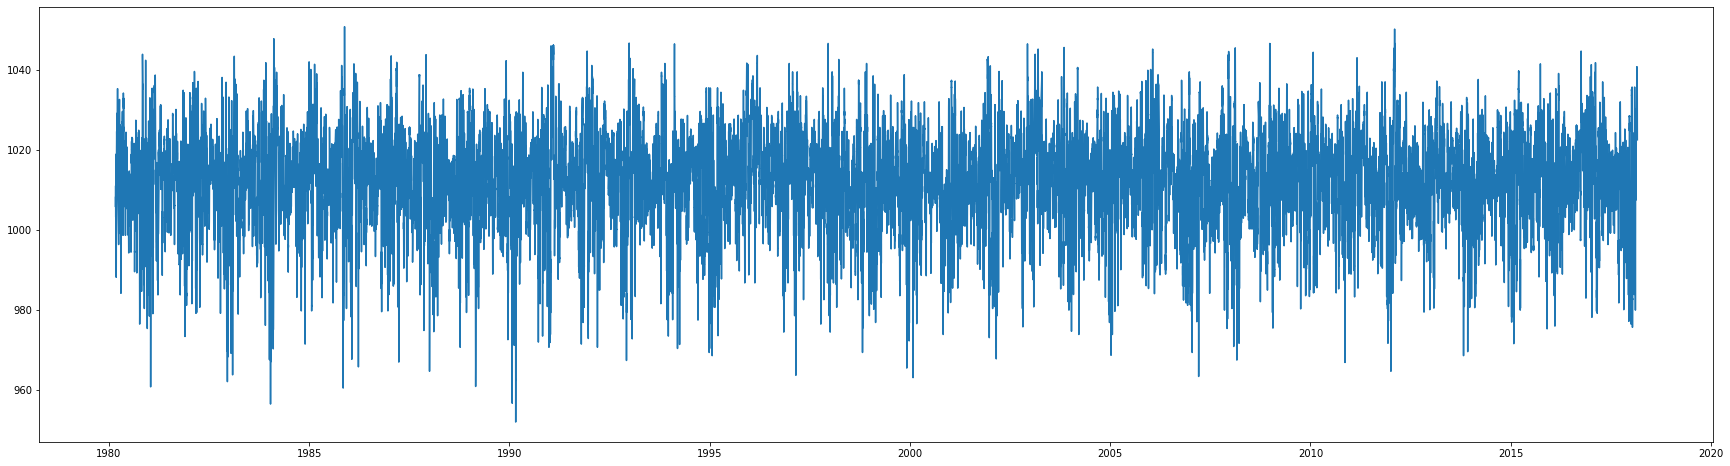

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8)) # 그림의 크기 지정
plt.plot(cityData['Roskilde']['Pressure']) #Roskilde라는 도시의 압력데이터를 시계열로 플로팅 하라.

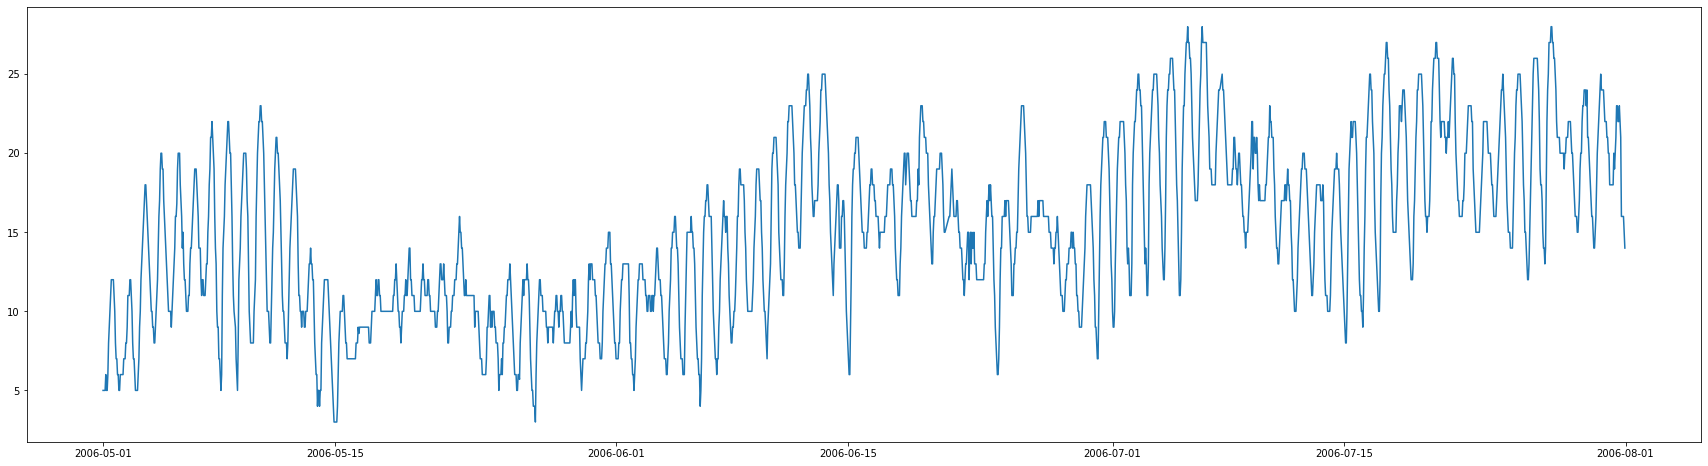

In [64]:
plt.figure(figsize=(30,8))
plt.plot(cityData['Aarhus']['2006-05':'2006-07']['Temp']) # df[DateTimeIndex][열]

In [9]:
# 원데이터
data=cityData['Odense']

In [10]:
# 도시 열은 제거
data=data.drop(columns=['City'])

## 타겟 데이터 만들기

In [65]:
# 타겟 데이터 (만약 앞으로 24시간동안의 날씨를 예측하고 싶다면)
# SHIFT 라는 함수를 이용해서 데이터를 이동시킬수 있다.
data_targets=cityData['Odense'][['Temp','WindSpeed','Pressure']].shift(-24)


In [66]:
data_targets

,Temp,WindSpeed,Pressure
DateTime,,,
1980-03-01 03:00:00,3.0,8.20,1010.7
1980-03-01 04:00:00,3.0,7.70,1010.1
1980-03-01 05:00:00,2.5,7.45,1009.5
1980-03-01 06:00:00,2.0,7.20,1008.9
1980-03-01 07:00:00,2.0,6.60,1008.3
...,...,...,...
2018-03-01 19:00:00,NaN,NaN,NaN
2018-03-01 20:00:00,NaN,NaN,NaN
2018-03-01 21:00:00,NaN,NaN,NaN


## 학습을 위해 numpy 배열로 만들기

In [12]:
# 학습에 사용되는 데이터
x_data = data.values[0:-24]

In [13]:
x_data.shape

(333096, 6)

In [14]:
y_data = data_targets.values[0:-24]
y_data.shape

(333096, 3)

## 학습데이터 테스트데이터로 분할

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_data,y_data,test_size=0.1) #데이터 분할 #셔플사용하지 않음

In [16]:
y_test.shape

(33310, 3)

## 데이터 스케일링

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler() # 스케일러 오브젝트 생성
x_train_scaled = scaler.fit_transform(x_train) # 변환

In [19]:
x_test_scaled = scaler.transform(x_test) # 훈련 데이터의 변환기를 다시 사용함에 주의

In [20]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## 데이터 생성기

In [21]:
import numpy as np
num_x_signals = x_data.shape[1]
num_y_signals = y_data.shape[1]
num_train = x_train.shape[0]

def batch_generator(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape)

        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape)

        for i in range(batch_size):
            idx = np.random.randint(num_train-sequence_length)

            x_batch[i] = x_train_scaled[idx:idx+sequence_length] # sequence 만큼의 
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]

        yield (x_batch, y_batch) #한번 반복할때마다 리턴하는 값


In [22]:
batch_size = 256 # 한번에 256개의 시퀀스 학습
sequence = 24 * 7 *8 # 한 시퀀스에 일주일치 데이터를 처리
generator = batch_generator(batch_size,sequence)

In [78]:
import numpy as np
x_batch, y_batch = next(generator)
x_batch.shape #256개의 배치, 256개의 시계열 별로 1344개의 길이, 6차원
y_batch.shape

(256, 1344, 3)

In [24]:
y_batch.shape

(256, 1344, 3)

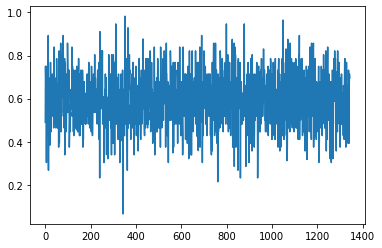

In [25]:
import matplotlib.pyplot as plt
plt.plot(x_batch[0, :,0])

In [26]:
np.expand_dims(x_test_scaled, axis=0).shape

(1, 33310, 6)

In [27]:
## 2차원으로 남아있는 테스팅 데이터도 3차원으로 바꾸어주어야 함
## np.exapnd_dims(원래 데이터, axis=0)
## 검증데이터 세팅
validation_data = (np.expand_dims(x_test_scaled, axis=0), np.expand_dims(y_test_scaled, axis=0))

## 순환신경망 만들기

In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
model = keras.Sequential([
                          layers.LSTM(512, return_sequences=True, input_shape=(None, num_x_signals)),
                          layers.Dense(num_y_signals, activation='sigmoid')
])



In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 512)         1062912   
                                                                 
 dense (Dense)               (None, None, 3)           1539      
                                                                 
Total params: 1,064,451
Trainable params: 1,064,451
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='mae',optimizer='adam')
callback_early_stopping  =  keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,  verbose=1)

In [32]:
model.fit_generator(generator=generator, epochs=20, steps_per_epoch=100, validation_data=validation_data, callbacks=callback_early_stopping)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


100/100 [==============================] - 186s 2s/step - loss: 0.0938 - val_loss: 0.0881
Epoch 2/20
100/100 [==============================] - 182s 2s/step - loss: 0.0863 - val_loss: 0.0814
Epoch 3/20
100/100 [==============================] - 182s 2s/step - loss: 0.0750 - val_loss: 0.0667
Epoch 4/20
100/100 [==============================] - 182s 2s/step - loss: 0.0619 - val_loss: 0.0615
Epoch 5/20
100/100 [==============================] - 182s 2s/step - loss: 0.0571 - val_loss: 0.0551
Epoch 6/20
100/100 [==============================] - 182s 2s/step - loss: 0.0555 - val_loss: 0.0546
Epoch 7/20
100/100 [==============================] - 182s 2s/step - loss: 0.0552 - val_loss: 0.0547
Epoch 8/20
100/100 [==============================] - 182s 2s/step - loss: 0.0550 - val_loss: 0.0546
Epoch 9/20
100/100 [==============================] - 182s 2s/step - loss: 0.0550 - val_loss: 0.0545
Epoch 10/20
100/100 [==============================] - 182s 2s/step - loss: 0.0549 - val_loss: 0.0544


In [46]:
def plot_comparison(start_idx, length=100, train=True):
    if train:
        x = x_train_scaled
        y_true = y_train
    else:
        x = x_test_scaled
        y_true = y_test
    
    end_idx = start_idx+length
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx] #(실제 24시간 뒤의 데이터)

    x = np.expand_dims(x,axis=0)
    y_pred = model.predict(x) #(현재 시점에서 예측된 24시간 뒤의 데이터)

    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0]) #데이터가 0~1로 스케일된 것을 다시 원상복구
    target_names = ['Temp','WindSpeed','Pressure']
    for signal in range(len(target_names)):
        signal_pred = y_pred_rescaled[:,signal]
        signal_true = y_true[:,signal]
        plt.figure(figsize=(30,5))
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')

        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

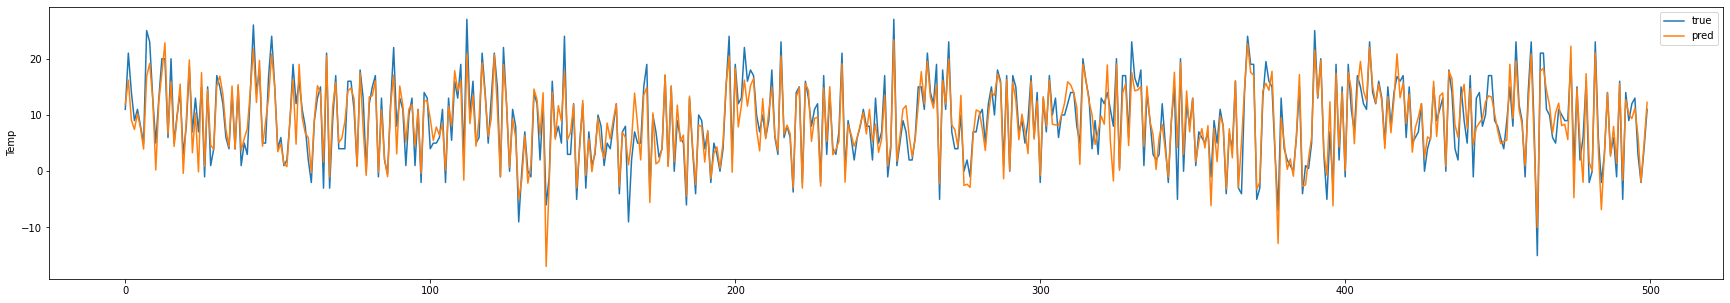

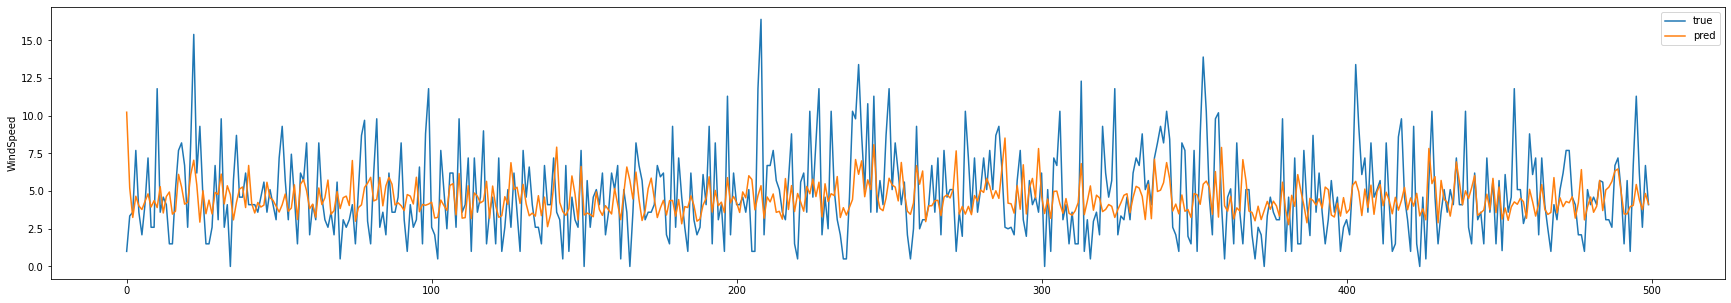

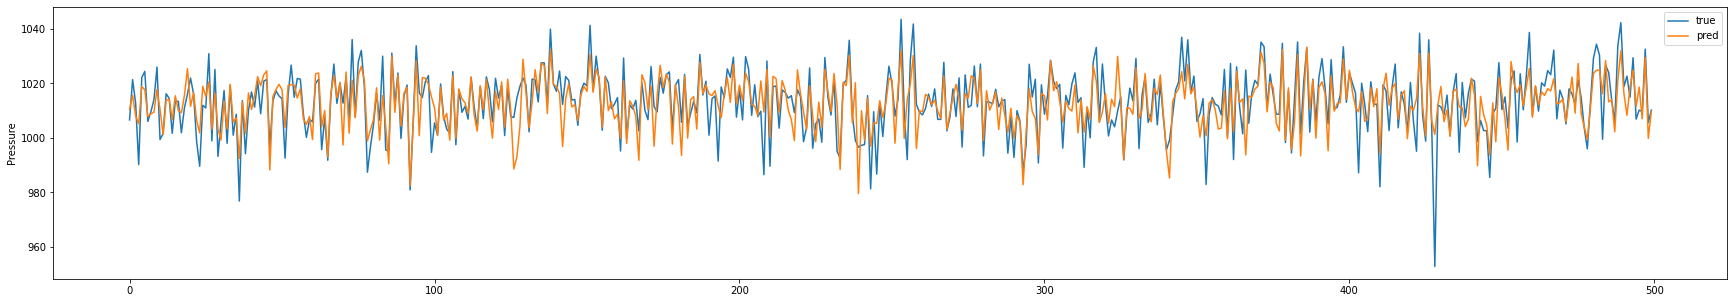

In [80]:
plot_comparison(start_idx=2000, length=500, train=True)